<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 151.2 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())

# Display summary statistics for categorical columns
print("\nSummary Statistics (Categorical Columns):")
print(df.describe(include='object'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Summary Statistics (Numerical Columns):
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here
# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values_filtered = missing_values[missing_values > 0]

print("Missing values per column:")
print(missing_values_filtered)


Missing values per column:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



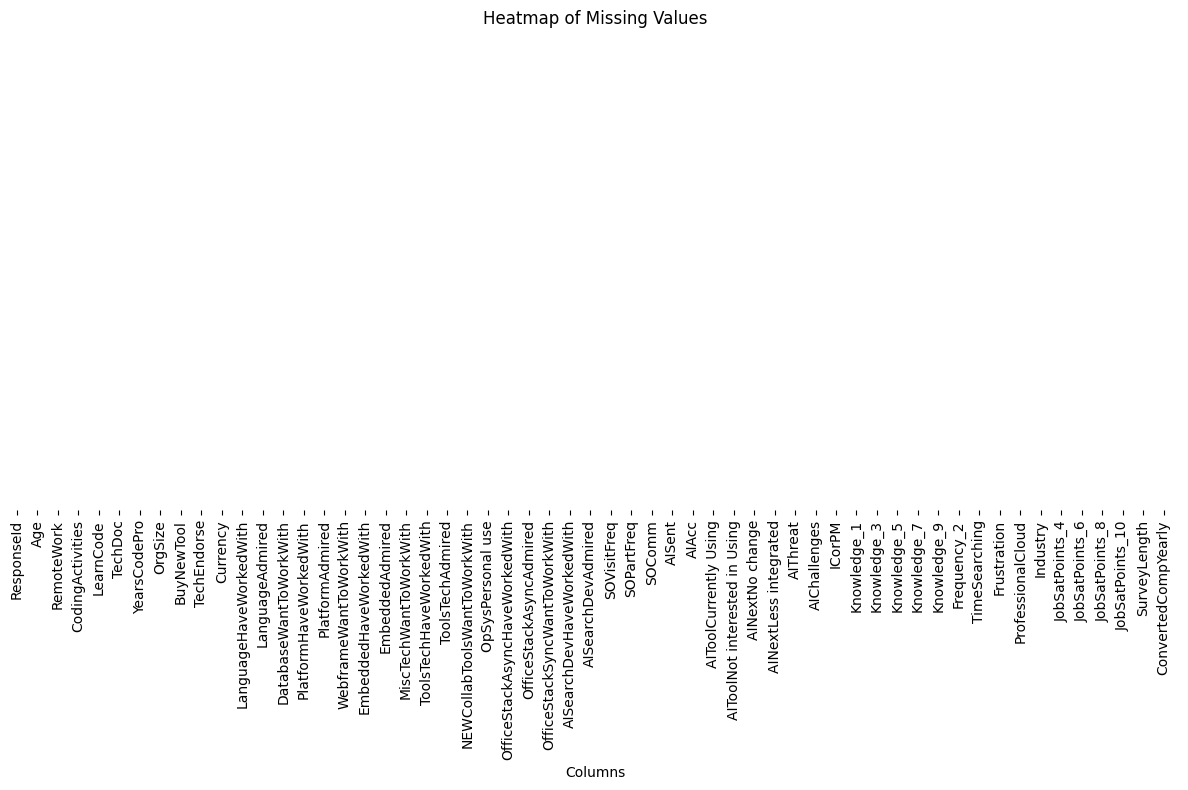

In [7]:
## Write your code here
# Set plot size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(df.isnull(), 
            cmap='YlGnBu', 
            cbar=False, 
            yticklabels=False, 
            linecolor='white', 
            linewidths=1)

plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [8]:
## Write your code here
# Step 1: Check missing values in Employment
missing_employment = df['Employment'].isnull().sum()
print(f"Missing values in 'Employment': {missing_employment}")


Missing values in 'Employment': 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [9]:
## Write your code here
# Specify the column (e.g., 'Employment')
column_name = 'Employment'

# Check if the column exists
if column_name in df.columns:
    most_frequent_value = df[column_name].mode()[0]
    frequency = df[column_name].value_counts().iloc[0]
    
    print(f"The most frequent value in '{column_name}' is: {most_frequent_value}")
    print(f"It appears {frequency} times.")
else:
    print(f"The column '{column_name}' does not exist in the dataset.")

The most frequent value in 'Employment' is: Employed, full-time
It appears 39041 times.


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [10]:
## Write your code here
# Step 1: Check how many missing values are in the 'Employment' column
missing_before = df['Employment'].isnull().sum()
print(f"Missing values in 'Employment' before imputation: {missing_before}")

# Step 2: Find the most frequent (mode) value in the column
most_frequent_employment = df['Employment'].mode()[0]

# Step 3: Fill missing values with the most frequent value
df['Employment'].fillna(most_frequent_employment, inplace=True)

# Step 4: Confirm imputation
missing_after = df['Employment'].isnull().sum()
print(f"Missing values in 'Employment' after imputation: {missing_after}")
print(f"Imputed missing values with: {most_frequent_employment}")

Missing values in 'Employment' before imputation: 0
Missing values in 'Employment' after imputation: 0
Imputed missing values with: Employed, full-time


/tmp/ipykernel_450/3790574389.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_employment, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_450/1273903093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='viridis')
/tmp/ipykernel_450/1273903093.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


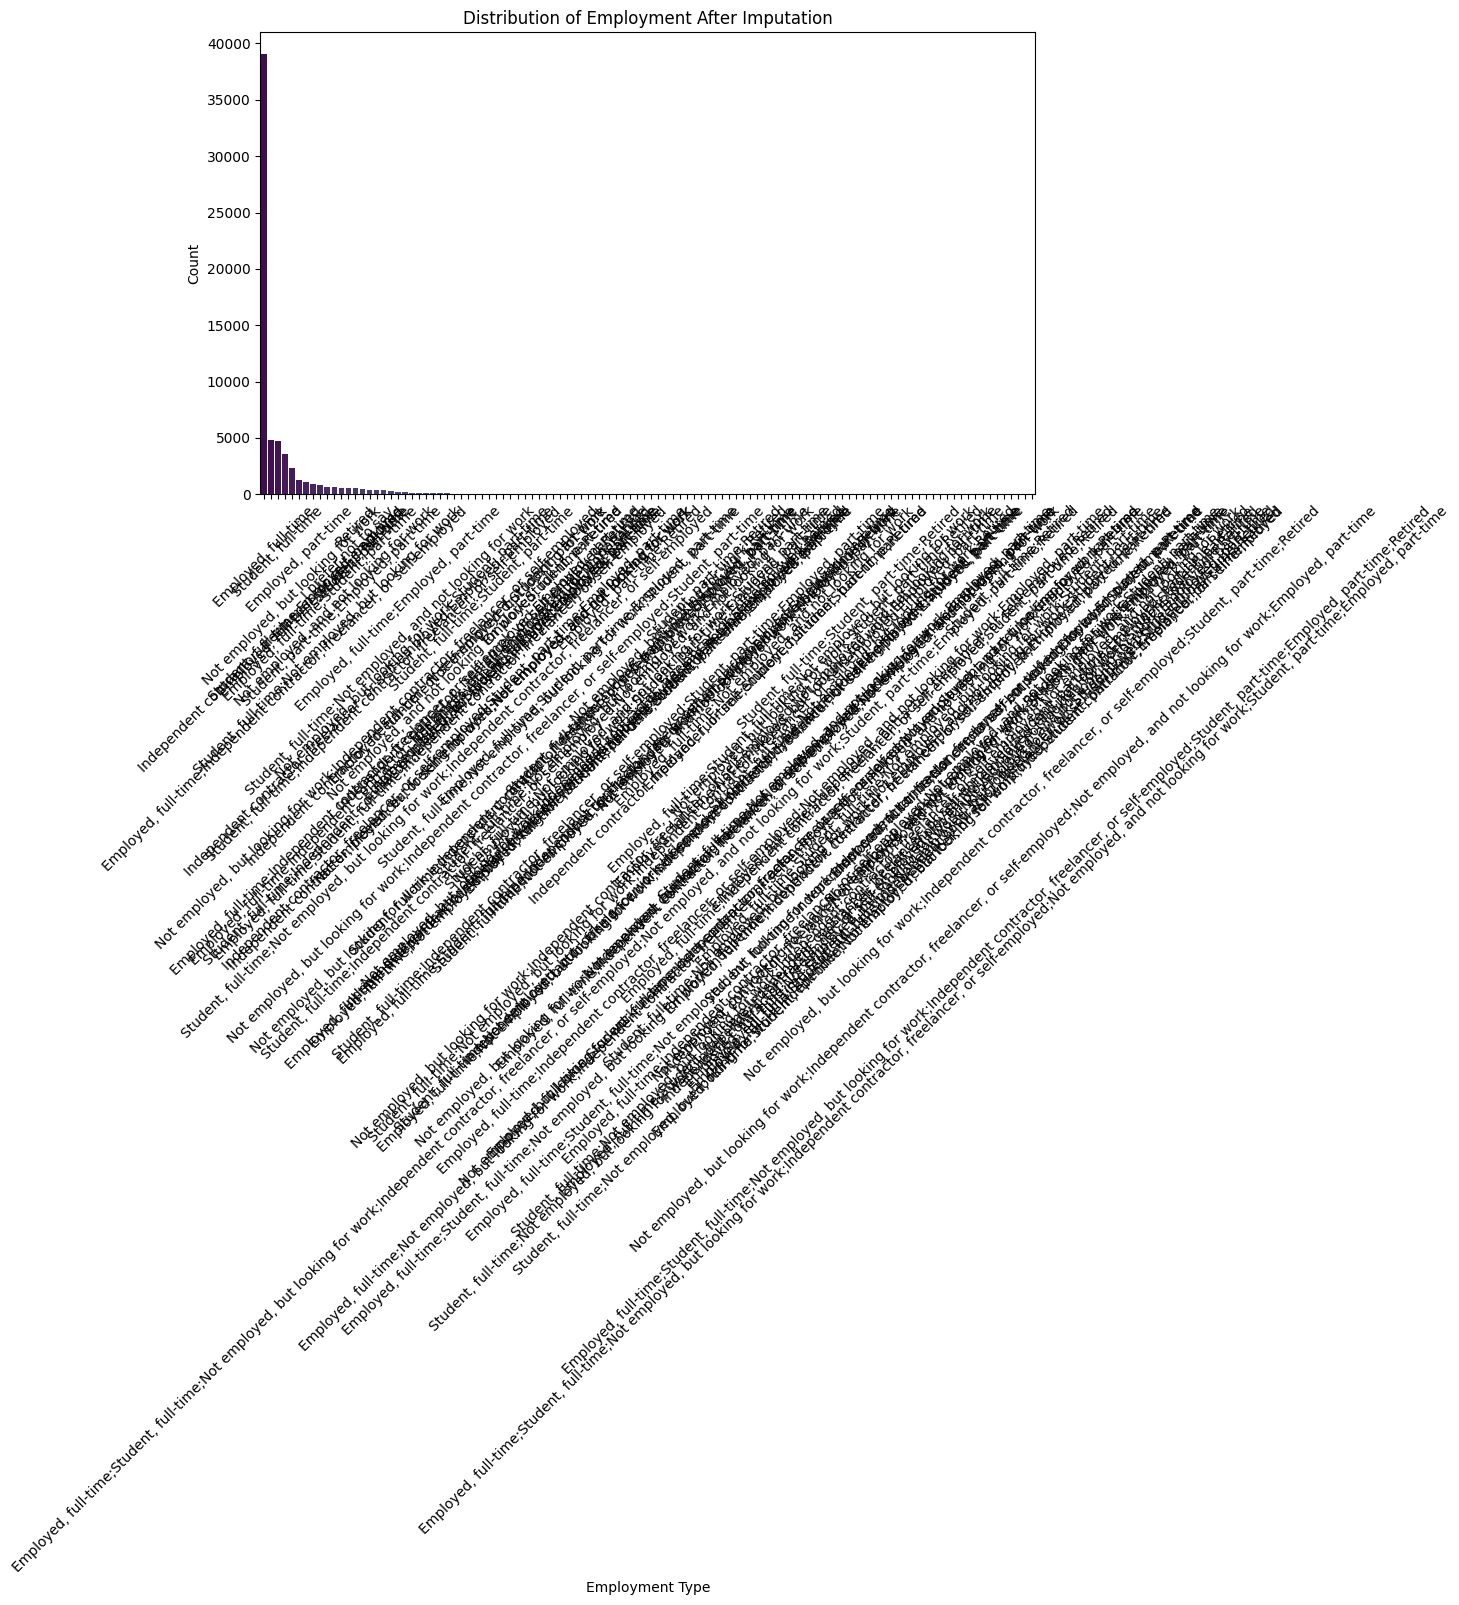

In [11]:
## Write your code here
# Set plot style and size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='viridis')

# Customize the plot
plt.title("Distribution of Employment After Imputation")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
